In [68]:
import  numpy as np
import  pandas as pd
import  matplotlib.pyplot as plt
import  konlpy
from knusl import KnuSL
from tqdm import  tqdm
import copy
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.family'] = 'NanumGothicCoding'
import nltk
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
import re, joblib
import konlpy
from konlpy.tag import Okt 
okt = Okt()
import string
# 한글 폰트 사용

In [34]:
def data_list(wordname):	
    with open('data/SentiWord_info.json', encoding='utf-8-sig', mode='r') as f:
        data = json.load(f)
    result = ['None','None']	
    for i in range(0, len(data)):
        if data[i]['word'] == wordname:
            result.pop()
            result.pop()
            result.append(data[i]['word_root'])
            result.append(data[i]['polarity'])	

    r_word = result[0]
    s_word = result[1]

    print('어근 : ' + r_word)
    print('극성 : ' + s_word)		


    return r_word, s_word

In [22]:
cd ~/WorkSpace/GoogleDrive/KnuSentiLex

/home/miwoos/WorkSpace/GoogleDrive/KnuSentiLex


In [23]:
ls

KnuSentiLex/  SentiWord_Dict.txt  knusl.py                  pos_pol_word.txt
README.md     __pycache__/        neg_pol_word.txt
ReadMe.txt    data/               obj_unknown_pol_word.txt


In [10]:
cd ~/WorkSpace/GoogleDrive

/home/miwoos/WorkSpace/GoogleDrive


In [11]:
ls

'Colab Notebooks'/  '넥스트이지!!'/
 Data/              '노트북갤러리크롤링 (1d6d1e47) (1d6d1e47) (1d6d1e47).csv'
 KnuSentiLex/        보관/
 Roster/             제주_전기차/
 chromedriver        테크노파크/
 mykey/              텍스트분석딥러닝.ipynb


## Use Data

In [12]:
df = pd.read_csv('노트북갤러리크롤링 (1d6d1e47) (1d6d1e47) (1d6d1e47).csv')

In [17]:
df.rename(columns={'0' : '내용'},inplace=True)

In [20]:
df.dropna(inplace=True)

In [33]:
df.내용[0]

'\n🔼 CES 2022 현장 (사진출처: CES 공식 홈페이지)[게임메카=김미희 기자] 끝이 안 보이는 그래픽카드 대란으로, 기존에 조명받지 못했던 게이밍 노트북이 대체품으로 떠올랐다. 기존에 게이밍 노트북은 데스크탑보다 성능, 가격 경쟁력, 업그레이드 등에서 다소 밀리는 경향을 보였다. 그러나 게이밍 PC를 맞출 때 가장 중요한 고성능 그래픽카드를 구하는 것이 하늘의 별따기가 됐다. 물량 자체가 턱없이 부족하고, 이로 인해 소매가가 정가를 아득히 뛰어넘었다. 이에 데스크탑 업그레이드를 생각했던 게이머 중 일부는 가격이 부풀려진 그래픽카드를 사느니 쓸만한 게이밍 노트북을 마련하겠다는 방향으로 선회하기도 했다.미국 최대 가전제품 전시회로 손꼽히는 CES에서 게이밍 노트북 다수가 경쟁적으로 등장한 배경도 급증한 수요가 영향을 준 것으로 보인다. 인텔, 엔비디아, AMD는 경쟁사보다 고성능을 보유했음을 강조한 게이밍 노트북용 CPU, GPU 등을 앞다퉈 선보였고, 앞서 소개한 세 회사가 발표한 제품이 탑재되는 노트북 다수도 베일을 벗었다. 그렇다면 올해 CES에서 공개된 제품 중 주목할만한 게이밍 노트북은 어떤 것이 있을까?인텔∙AMD∙엔비디아, 데스크탑에서 노트북까지 확장된 3자구도올해 CES를 관통한 트렌드 중 하나는 글로벌 시장을 꽉 잡고 있는 인텔, AMD, 엔비디아의 경쟁구도가 게이밍 노트북으로 확장됐다는 것이다. 세 회사 모두 CES를 통해 게이밍 노트북에 탑재될 CPU와 GPU 신제품을 발표하며 무대를 후끈하게 달궜다. 그 중에도 많은 이목을 집중시킨 부분은 첨예한 대립각을 세운 인텔과 AMD다.인텔은 CES 2022를 통해 노트북을 겨냥한 12세대 모바일 프로세서 제품 28종을 선보였다. 12세대 인텔 코어 모바일 프로세서는 전 세대보다 최대 40% 높은 성능을 보유했고, 게임 구동 속도는 28% 빨라졌다. 그 중에도 최상위 모델로 소개된 H시리즈는 최대 5Ghz 클럭 속도, 14코어, 스레드 20개를 지원하며, 모바일 프로세서 최초로 최대 4800

## 빈도수 분석

In [37]:
userwant = df.내용.copy()
userwant.dropna(inplace=True)
userwant.reset_index(inplace=True,drop=True)
userwant_list=userwant.values


sum_list = []
for i in range(len(userwant_list)):
    sum_list+=userwant_list[i].split(',')
len(sum_list)

2349

In [52]:
import re
new_tokens =[]
for token in sum_list:
    new_token = re.sub('[^가-힣 ]', '', token)
    if new_token:                       # ''는 포함시키지 말 것
        new_tokens.append(new_token)

In [57]:
len(new_tokens)

2272

In [55]:
new_tokensplt = nltk.Text(new_tokens, name='내용')
# # plt.figure(figsize=(15,6))
# new_tokensplt.plot(50)
# plt.show()

In [72]:
doublenew_tokensplt = [] 
for tokn in tqdm(new_tokensplt):
    doublenew_tokensplt.append(tokn.split(' '))

100%|███████████████████████████████████| 2272/2272 [00:00<00:00, 406668.32it/s]


In [76]:
text_cafe=str(doublenew_tokensplt)
tokens = okt.nouns(text_cafe)
tokens

['현장',
 '사진',
 '출처',
 '공식',
 '홈페이지',
 '게임메카',
 '김미희',
 '기자',
 '끝',
 '안',
 '그래픽카드',
 '대란',
 '기존',
 '조명',
 '게이',
 '밍',
 '노트북',
 '대체',
 '품',
 '기존',
 '게이',
 '밍',
 '노트북',
 '데스크탑',
 '성능',
 '가격',
 '경쟁력',
 '업그레이드',
 '등',
 '다소',
 '경향',
 '게이',
 '밍',
 '를',
 '때',
 '가장',
 '고성능',
 '그래픽카드',
 '구',
 '것',
 '하늘',
 '별',
 '물량',
 '자체',
 '턱',
 '이로',
 '소매',
 '가가',
 '정가',
 '이',
 '데스크탑',
 '업그레이드',
 '생각',
 '게이머',
 '중',
 '일부',
 '가격',
 '그래픽카드',
 '게이',
 '밍',
 '노트북',
 '마련',
 '방향',
 '선회',
 '미국',
 '최대',
 '가전제품',
 '전시회',
 '게이',
 '밍',
 '노트북',
 '다수',
 '경쟁',
 '등장',
 '배경',
 '급증',
 '수요',
 '영향',
 '준',
 '것',
 '인텔',
 '엔비디아',
 '경쟁',
 '고성능',
 '보유',
 '음',
 '강조',
 '게이',
 '밍',
 '노트북',
 '용',
 '등',
 '앞',
 '앞서',
 '소개',
 '세',
 '회사',
 '발표',
 '제품',
 '탑재',
 '노트북',
 '다수',
 '베일',
 '올해',
 '공개',
 '제품',
 '중',
 '게이',
 '밍',
 '노트북',
 '것',
 '인텔',
 '엔비디아',
 '데스크탑',
 '노트북',
 '확장',
 '자구',
 '올해',
 '를',
 '관통',
 '트렌드',
 '중',
 '하나',
 '글로벌',
 '시장',
 '꽉',
 '잡고',
 '인텔',
 '엔비디아',
 '경쟁',
 '구도',
 '게이',
 '밍',
 '노트북',
 '확장',
 '것',
 '세',
 '회사',
 '모두',
 '를',
 '통해'

In [80]:
tokens

['현장',
 '사진',
 '출처',
 '공식',
 '홈페이지',
 '게임메카',
 '김미희',
 '기자',
 '끝',
 '안',
 '그래픽카드',
 '대란',
 '기존',
 '조명',
 '게이',
 '밍',
 '노트북',
 '대체',
 '품',
 '기존',
 '게이',
 '밍',
 '노트북',
 '데스크탑',
 '성능',
 '가격',
 '경쟁력',
 '업그레이드',
 '등',
 '다소',
 '경향',
 '게이',
 '밍',
 '를',
 '때',
 '가장',
 '고성능',
 '그래픽카드',
 '구',
 '것',
 '하늘',
 '별',
 '물량',
 '자체',
 '턱',
 '이로',
 '소매',
 '가가',
 '정가',
 '이',
 '데스크탑',
 '업그레이드',
 '생각',
 '게이머',
 '중',
 '일부',
 '가격',
 '그래픽카드',
 '게이',
 '밍',
 '노트북',
 '마련',
 '방향',
 '선회',
 '미국',
 '최대',
 '가전제품',
 '전시회',
 '게이',
 '밍',
 '노트북',
 '다수',
 '경쟁',
 '등장',
 '배경',
 '급증',
 '수요',
 '영향',
 '준',
 '것',
 '인텔',
 '엔비디아',
 '경쟁',
 '고성능',
 '보유',
 '음',
 '강조',
 '게이',
 '밍',
 '노트북',
 '용',
 '등',
 '앞',
 '앞서',
 '소개',
 '세',
 '회사',
 '발표',
 '제품',
 '탑재',
 '노트북',
 '다수',
 '베일',
 '올해',
 '공개',
 '제품',
 '중',
 '게이',
 '밍',
 '노트북',
 '것',
 '인텔',
 '엔비디아',
 '데스크탑',
 '노트북',
 '확장',
 '자구',
 '올해',
 '를',
 '관통',
 '트렌드',
 '중',
 '하나',
 '글로벌',
 '시장',
 '꽉',
 '잡고',
 '인텔',
 '엔비디아',
 '경쟁',
 '구도',
 '게이',
 '밍',
 '노트북',
 '확장',
 '것',
 '세',
 '회사',
 '모두',
 '를',
 '통해'

In [81]:
import re
new_tokens =[]
for token in tokens:
    new_token = re.sub('[^가-힣 ]', '', token)
    if new_token:                       # ''는 포함시키지 말 것
        new_tokens.append(new_token)

In [83]:
len(new_tokens)

23660

In [88]:
new_tokensplt = nltk.Text(new_tokens)

In [128]:
stop_words = '''거 정도 더 임 좀 때 개 뭐 이 것 키 함 내 년 기 안 로 도 생각 진짜 지금 존나 사람
 문제 이상 나 새끼 왜 용 데 말 글 은 좆 돈 번 겜 중 만 노트북 세대 그냥 만원 하나 게이 차이 다시 수
  수 외 걸 든 팡 밍 등 판 롤 일 보살 그 및 보 살 놈 점 비 전 애 씨발 병신 주는 또 지랄 스 재 노 시 쪽
    를 음 
'''
stop_list = stop_words.split()
new_tokensplt = [token for token in new_tokensplt if token not in stop_list]
new_tokensplt = nltk.Text(new_tokensplt)

In [129]:
data = new_tokensplt.vocab().most_common(300)
data

[('성능', 151),
 ('인치', 138),
 ('게임', 130),
 ('가격', 128),
 ('윈도우', 114),
 ('램', 100),
 ('제품', 95),
 ('그램', 92),
 ('사용', 85),
 ('화면', 82),
 ('배터리', 81),
 ('서피스', 80),
 ('프로', 78),
 ('보드', 75),
 ('맥북', 68),
 ('인텔', 67),
 ('시간', 64),
 ('가능', 64),
 ('여부', 64),
 ('무게', 61),
 ('모드', 61),
 ('모델', 59),
 ('용도', 59),
 ('전력', 57),
 ('리전', 57),
 ('추천', 57),
 ('북', 57),
 ('중고', 55),
 ('설치', 53),
 ('작업', 52),
 ('레노버', 51),
 ('쿠팡', 49),
 ('소리', 47),
 ('모니터', 46),
 ('삼성', 46),
 ('데탑', 45),
 ('놋북', 44),
 ('때문', 44),
 ('최대', 43),
 ('구매', 42),
 ('브랜드', 40),
 ('고민', 40),
 ('보고', 39),
 ('일단', 39),
 ('상관', 39),
 ('회사', 38),
 ('이번', 38),
 ('추가', 37),
 ('반품', 37),
 ('그래픽', 37),
 ('해상도', 36),
 ('사양', 36),
 ('발열', 36),
 ('팬', 36),
 ('코어', 35),
 ('디스플레이', 35),
 ('소음', 35),
 ('한번', 35),
 ('사서', 35),
 ('여기', 34),
 ('사실', 34),
 ('주파', 34),
 ('아수스', 33),
 ('설정', 33),
 ('연결', 32),
 ('월', 32),
 ('달', 32),
 ('크기', 32),
 ('프레임', 31),
 ('영상', 31),
 ('다른', 31),
 ('오멘', 30),
 ('겜트북', 30),
 ('우측', 30),
 ('충전', 30),
 ('게', 30)

In [42]:
sum_list[3]

' 업그레이드 등에서 다소 밀리는 경향을 보였다. 그러나 게이밍 PC를 맞출 때 가장 중요한 고성능 그래픽카드를 구하는 것이 하늘의 별따기가 됐다. 물량 자체가 턱없이 부족하고'

In [ ]:
word_bean = nltk.Text(sum_list, name='노트북갤러리')
plt.figure(figsize=(15,6))
word_bean.plot(50)
plt.show()
# plt.savefig('빈도수파악.png')

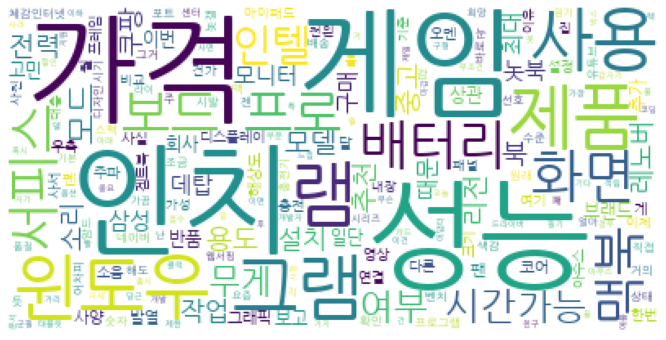

<Figure size 432x288 with 0 Axes>

In [130]:
wc = WordCloud(
    font_path='NanumGothic.ttf',
    relative_scaling=0.00001,
    background_color='white'
).generate_from_frequencies(dict(data))

plt.figure(figsize=(12,6))
plt.imshow(wc)
plt.axis('off')
plt.show()
plt.savefig('labtop.png')

## 감성분석

In [156]:
df.내용[5]

'\n컴본갤 가서 견적 잡으면 120쯤에 3060ti로 놋북 3070~tgp 낮은 3080 씹어먹는 견적 짤수 있는데그거 놋갤 들고오면 차라리 박수라도 쳐줄수 있다 ㅅㅂ ㅋㅋㅋㅋ\n'

In [157]:
KnuSL.data_list(df.내용[5])

('None', 'None')

In [ ]:
data_list
